#ASTR 19 Group Project
Facilitator: Sabrina Lee,
Scribe: Alia Toth-Smith,
Interfacer: Gordon Cai,
Editor: Ali Taquie



In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib 
import tensorflow as tf
print(tf.__version__)

2.15.0


In [56]:
# Define the data
data = """1 8:07 6.57
1 15:37 -0.39
2 8:55 5.38
2 16:25 -1.74
3 9:45 5.26
3 17:14 -1.36
4 10:35 4.13
4 18:00 -1.15
5 11:28 3.48
5 18:46 -1.61
6 12:22 2.62
6 19:31 0.05
7 13:24 1.83
7 20:16 1.01
8 3:22 3.57
8 21:01 0.73
9 4:07 4.54
9 21:46 2.17
10 4:50 3.76
10 11:58 2.88
11 5:31 3.90
11 12:56 1.92
12 6:08 4.73
12 13:45 1.74
13 6:47 5.66
13 14:25 0.79
14 7:22 5.33
14 15:00 -0.04
15 7:59 5.23
15 15:34 -1.12
16 8:34 6.67
16 16:08 -0.61
17 9:10 4.74
17 16:41 -0.93
18 9:45 4.69
18 17:12 -1.29
19 10:21 4.20
19 17:45 0.22
20 10:57 3.68
20 18:15 0.26
21 11:38 2.47
21 18:48 0.36
22 12:25 2.59
22 19:20 0.99
23 2:22 4.10
23 19:52 1.87
24 2:58 3.17
24 20:30 1.60
25 3:37 3.71
25 10:44 3.10
26 4:23 4.04
26 11:55 2.49
27 5:15 4.07
27 12:57 2.18
28 6:09 5.93
28 13:50 0.70
29 7:05 6.89
29 14:39 0.21
30 7:58 6.72
30 15:27 0.22
31 8:50 6.77
31 16:10 -1.68
32 9:40 5.77
32 16:52 -1.32
33 10:30 4.35
33 17:34 -0.73
34 11:19 4.23
34 18:12 -0.38
35 12:10 2.24
35 18:49 -0.61
36 1:32 3.45
36 19:24 -0.46
37 2:13 4.13
37 20:00 1.21
38 2:54 3.34
38 9:54 2.58
39 3:39 3.32
39 11:15 3.26
40 4:29 5.21
40 12:22 2.39
41 5:21 4.83
41 13:14 2.41"""

In [57]:
'''
define an oscillatory function in Python to describe
 the intra- and inter-day variations in the tide
 '''
def sinsuoid(x, A, f, p):
    return A*np.sin(2.0*np.pi*f *x + p)

#define the oscillatory function
def oscillatory_function(x, A, B, omega, phi):
    return A * np.sin(omega * x *np.pi + phi) + B



In [58]:
# Split the data and convert to DataFrame
data = [line.split() for line in data.split('\n')]

df = pd.DataFrame(data, columns=['Day', 'Time', 'Height'])
df['Day'] = pd.to_numeric(df['Day'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour + pd.to_datetime(df['Time'], format='%H:%M').dt.minute / 60
df['Height'] = pd.to_numeric(df['Height'])

print(df['Time'])

0      8.116667
1     15.616667
2      8.916667
3     16.416667
4      9.750000
        ...    
77    11.250000
78     4.483333
79    12.366667
80     5.350000
81    13.233333
Name: Time, Length: 82, dtype: float64


In [62]:
# Fit the function to the data
popt, pcov = curve_fit(oscillatory_function, df['Time'], df['Height'], sigma=0.25*np.ones_like(df['Height']))

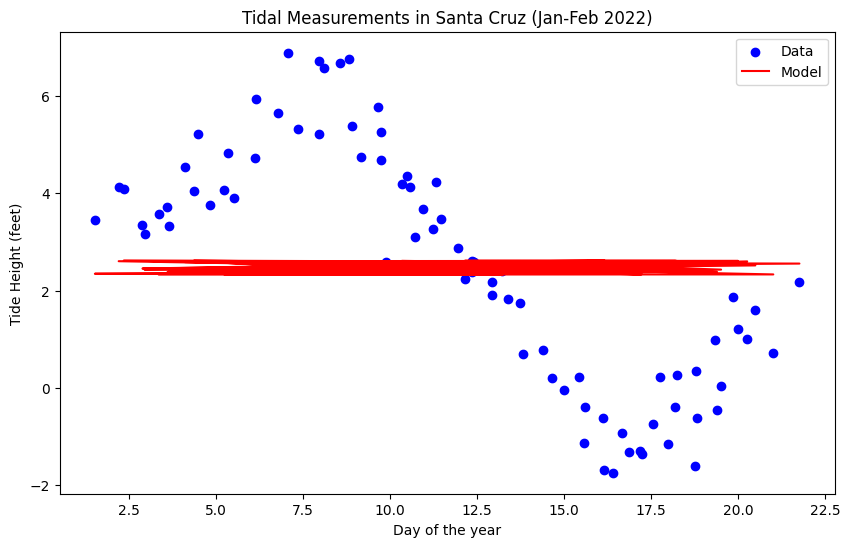

In [65]:
# Plot the data and model
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Height'], label='Data', color='blue')
plt.plot(df['Time'], oscillatory_function(df['Time'], *popt), label='Model', color='red')
plt.xlabel('Day of the year')
plt.ylabel('Tide Height (feet)')
plt.title('Tidal Measurements in Santa Cruz (Jan-Feb 2022)')
plt.legend()
plt.savefig('tides_model.pdf')
plt.show()

[8.116666666666667, 15.616666666666667, 8.916666666666666, 16.416666666666668, 9.75, 17.233333333333334, 10.583333333333334, 18.0, 11.466666666666667, 18.766666666666666, 12.366666666666667, 19.516666666666666, 13.4, 20.266666666666666, 3.3666666666666667, 21.016666666666666, 4.116666666666666, 21.766666666666666, 4.833333333333333, 11.966666666666667, 5.516666666666667, 12.933333333333334, 6.133333333333334, 13.75, 6.783333333333333, 14.416666666666666, 7.366666666666666, 15.0, 7.983333333333333, 15.566666666666666, 8.566666666666666, 16.133333333333333, 9.166666666666666, 16.683333333333334, 9.75, 17.2, 10.35, 17.75, 10.95, 18.25, 11.633333333333333, 18.8, 12.416666666666666, 19.333333333333332, 2.3666666666666667, 19.866666666666667, 2.966666666666667, 20.5, 3.6166666666666667, 10.733333333333333, 4.383333333333334, 11.916666666666666, 5.25, 12.95, 6.15, 13.833333333333334, 7.083333333333333, 14.65, 7.966666666666667, 15.45, 8.833333333333334, 16.166666666666668, 9.666666666666666, 

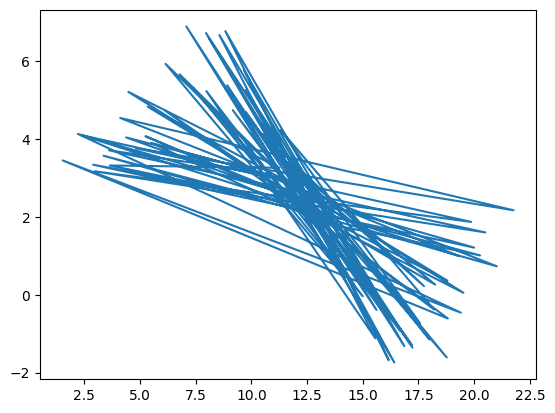

In [4]:
'''1
Using the scipy library, fit the oscillatory function to the
data assuming the root mean squared experimental error on the
 height of the tide is 0.25 ft
'''

def minutes_to_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    time = hours + (minutes / 60)

    return time

_, times, heights = np.loadtxt('ASTR19_F23_group_project_data.txt', dtype=
               [('day', 'i'), ('time', 'U5'), ('value', float)], skiprows=3, unpack=True)

times_adj = [minutes_to_hours(time) for time in times]
plt.plot(times_adj,heights)
print(times_adj)
print(heights)
plt.show()



In [ ]:
'''
subtract off the best fit function from the data and plot the
residuals. Assess graphically and mathematically deviations of
 the measured tidal data from the model. Plot a histogram of the
 residuals and measure the standard deviation
'''

#start code







'\nsubtract off the best fit function from the data and plot the\nresiduals. Assess graphically and mathematically deviations of\n the measured tidal data from the model. Plot a histogram of the\n residuals and measure the standard deviation\n'

In [ ]:
'''
Add a single 2ft outlier to the histogram of data and replot it
 as part of your Jupyter notebook
'''

#start code









'\nAdd a single 2ft outlier to the histogram of data and replot it\n as part of your Jupyter notebook\n'